**Challenges to Deploy the High level models on Edge devices**
- Limited Compute power of Edge devices
- Limited Memory
- Battery consumption
- Application size
- Processing power, storage of microcontrollers is less

To overcome this, TensorFlow Lite can be used wjhich supports Android, ios, Linux based IoT devices.


WorkFlow of TF Lite model
- Train TensorFlow model - Protocol Buffer Format
- Convert to TF Lite model - Flat Buffer Format (TF Lite converter - accuracy is not lost)
- Deploy and run on edge devices (Inference on Edge devices)

**Creating a TensorFlow DL Model - Protocol Buffer Format**

**Imports**

In [1]:
import os
import numpy as np
import h5py #save the trained models in h5 format
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import accuracy_score #to check the accuracy of crated TensorFlow model
from sys import getsizeof #

In [2]:
print(tf.__version__)

2.6.0


**Defining Helper functions**

In [3]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size #to return size of the file in bytes

In [4]:
def convert_bytes(size, unit=None):  #to convert the bytes to KB and MB
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

**Importing the dataset and defining label names**

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Exploring the data**

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

**Preprocessing**

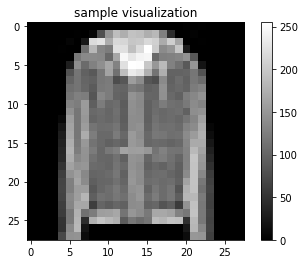

In [12]:
plt.imshow(train_images[28],cmap='gray')
plt.colorbar()
plt.title('sample visualization')
plt.show()

In [13]:
# scaling the images
train_images = train_images/255.0
test_images = test_images/255.0


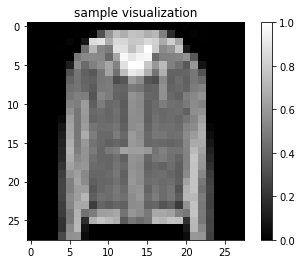

In [14]:
plt.imshow(train_images[28],cmap='gray')
plt.colorbar()
plt.title('sample visualization')
plt.show()

**Build and compile a simple Deep Learning model**

In [15]:
model = keras.Sequential([
                          Flatten(input_shape=(28,28)),
                          Dense(128, activation='relu'),
                          Dense(10)])

In [16]:
model.compile(optimizer ='adam', 
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [17]:
model.fit(train_images,train_labels,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4976 - accuracy: 0.8247
Epoch 2/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3769 - accuracy: 0.8632
Epoch 3/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3375 - accuracy: 0.8772
Epoch 4/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3129 - accuracy: 0.8856
Epoch 5/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2940 - accuracy: 0.8913
Epoch 6/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2792 - accuracy: 0.8970
Epoch 7/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2682 - accuracy: 0.9015
Epoch 8/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2572 - accuracy: 0.9040
Epoch 9/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2480 - accuracy: 0.9085
Epoch 10/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.239

In [18]:
KERAS_MODEL_NAME = 'tf_model_fashion_mnist.h5'
model.save(KERAS_MODEL_NAME)

In [19]:
#check the size of the trained TensorFlow keras model 
keras_model_size = convert_bytes(get_file_size('/content/tf_model_fashion_mnist.h5'),'MB')
print(keras_model_size)

File size: 1.19 Megabytes
None


The TensorFlow model has an accuracy of 92% and has size of 1.2MB

In [20]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy: ', (100*test_accuracy),'%')

313/313 - 0s - loss: 0.3653 - accuracy: 0.8833
Test accuracy:  88.33000063896179 %


The accuracy of our Trained model on the unseen test images is 88.7%

# **TF Lite Model**

In [21]:
TF_LITE_MODEL_FILE_NAME = 'tf_lite_model.tflite'

In [22]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp6_ovs15b/assets


In [23]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, 'wb').write(tflite_model)

408544

In [24]:
tflite_file_size = convert_bytes(get_file_size('/content/tf_lite_model.tflite'),'MB')

File size: 0.39 Megabytes


## **Evaluation of TFLite model on test data and Comparision with original TensorFlow Model**
Check Input Tensor Shape

In [25]:
interpreter = tf.lite.Interpreter(model_path='/content/tf_lite_model.tflite')
input_details =interpreter.get_input_details()
output_details = interpreter.get_output_details()
print('Input details: ', input_details)
print('Output detaisl: ', output_details)

Input details:  [{'name': 'flatten_input', 'index': 0, 'shape': array([ 1, 28, 28], dtype=int32), 'shape_signature': array([-1, 28, 28], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output detaisl:  [{'name': 'Identity', 'index': 8, 'shape': array([ 1, 10], dtype=int32), 'shape_signature': array([-1, 10], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [26]:
test_images.shape
test_images.dtype

(10000, 28, 28)

In [27]:
test_images.dtype

dtype('float64')

Resize the Tensor Shape

In [28]:
interpreter.resize_tensor_input(input_details[0]['index'],(10000,28,28))
interpreter.resize_tensor_input(output_details[0]['index'],(10000,10))
interpreter.allocate_tensors()
input_details =interpreter.get_input_details()
output_details = interpreter.get_output_details()
print('Input details: ', input_details)
print('Output detaisl: ', output_details)

Input details:  [{'name': 'flatten_input', 'index': 0, 'shape': array([10000,    28,    28], dtype=int32), 'shape_signature': array([-1, 28, 28], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output detaisl:  [{'name': 'Identity', 'index': 8, 'shape': array([10000,    10], dtype=int32), 'shape_signature': array([-1, 10], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


The shape of the Tensors of TFLite model are resized to match the test images shape anda data type

In [29]:
test_images.dtype

dtype('float64')

In [30]:
test_images = np.array(test_images, dtype = np.float32)

In [31]:
test_images.dtype

dtype('float32')

In [32]:
# set the tensor of our interpreter to changes made for the datatype
interpreter.set_tensor(input_details[0]['index'], test_images)
interpreter.invoke() #passes iojn the inputs and get outputs ready
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
print('Prediction results shape: ', tflite_model_predictions.shape)
prediction_classes = np.argmax(tflite_model_predictions, axis=1)

Prediction results shape:  (10000, 10)


In [33]:
acc_tflite = accuracy_score(prediction_classes,test_labels)
print('Test accuracy using TFLite model: ', (100*acc_tflite), '%')
print('Test accuracy using TensorFLow model: ', (100*test_accuracy),'%')

Test accuracy using TFLite model:  88.33 %
Test accuracy using TensorFLow model:  88.33000063896179 %


The accuracies of the TensorFlow keras model and the TensorFlow Lite model are same, but the space of the model has been drastically reduced by converting to a TFLite model

The TFLite Model can be further compressed in terms of size, with out loosing the accuracy

# **TFLite Model Float 16 - Optimizing**

Every weight value is of datatype float 32 of our TFLite model. Compressing it to Float16 would still reduce the size of our TFlite model, loosing very little accuracy

In [35]:
TF_LITE_MODEL_FLOAT16__FILE_NAME = 'tflite_float16_model.tflite'

In [37]:
tflite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_converter.target_spec.supported_types = [tf.float16]
tflite_model = tflite_converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp7wwrg6r6/assets


INFO:tensorflow:Assets written to: /tmp/tmp7wwrg6r6/assets


In [38]:
#writing the temporarly created variable to hard disk
tflite_model_name = TF_LITE_MODEL_FLOAT16__FILE_NAME
open(tflite_model_name, 'wb').write(tflite_model)

205696

In [45]:
convert_bytes(get_file_size('/content/tflite_float16_model.tflite'),'KB')
convert_bytes(get_file_size('/content/tf_lite_model.tflite'),'KB')

File size: 200.875 Kilobytes
File size: 398.969 Kilobytes


Afer converting the weights dtype to Float16 the size of model is still reduced

# **TF Lite Size Quantized**

In [47]:
TF_LITE_QUANT_MODEL = 'tflite_quant_model.tflite'

We let the TFLite decide which dtype is suitable for the model, instead of specifying float16 manually. This is Quantization

In [48]:
tflite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = tflite_converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp6eqc5fqc/assets


INFO:tensorflow:Assets written to: /tmp/tmp6eqc5fqc/assets


In [49]:
#writing the temporarly created variable to hard disk
tflite_model_name = TF_LITE_QUANT_MODEL
open(tflite_model_name, 'wb').write(tflite_model)

103840

In [50]:
convert_bytes(get_file_size('/content/tflite_quant_model.tflite'),'KB')
convert_bytes(get_file_size('/content/tflite_float16_model.tflite'),'KB')
convert_bytes(get_file_size('/content/tf_lite_model.tflite'),'KB')

File size: 101.406 Kilobytes
File size: 200.875 Kilobytes
File size: 398.969 Kilobytes


Just by Optimizing the TFlite model by size, its size is further reduced to half. Lets check the accuracy of this Quantized model

# **Acuuracy of the final quantized model **



Check input Tensor Shape

In [52]:
interpreter = tf.lite.Interpreter(model_path='/content/tflite_quant_model.tflite')
input_details =interpreter.get_input_details()
output_details = interpreter.get_output_details()
print('Input shape: ', input_details[0]['shape'])
print('Input type: ', input_details[0]['dtype'])
print('Output type: ', output_details[0]['dtype'])
print('Output shape: ', output_details[0]['shape'])

Input shape:  [ 1 28 28]
Input type:  <class 'numpy.float32'>
Output type:  <class 'numpy.float32'>
Output shape:  [ 1 10]


In [54]:
print('Test images shape: ',test_images.shape)
print('Test images dtype: ',test_images.dtype)

Test images shape:  (10000, 28, 28)
Test images dtype:  float32


In [55]:
test_images = np.array(test_images, dtype = np.float32)

In [56]:
interpreter.resize_tensor_input(input_details[0]['index'],(10000,28,28))
interpreter.resize_tensor_input(output_details[0]['index'],(10000,10))
interpreter.allocate_tensors()
input_details =interpreter.get_input_details()
output_details = interpreter.get_output_details()
print('Input shape: ', input_details[0]['shape'])
print('Input type: ', input_details[0]['dtype'])
print('Output type: ', output_details[0]['dtype'])
print('Output shape: ', output_details[0]['shape'])

Input shape:  [10000    28    28]
Input type:  <class 'numpy.float32'>
Output type:  <class 'numpy.float32'>
Output shape:  [10000    10]


In [57]:
# set the tensor of our interpreter to changes made for the datatype
interpreter.set_tensor(input_details[0]['index'], test_images)
interpreter.invoke() #passes iojn the inputs and get outputs ready
tflite_quant_model_predictions = interpreter.get_tensor(output_details[0]['index'])
print('Prediction results shape: ', tflite_quant_model_predictions.shape)
prediction_classes = np.argmax(tflite_quant_model_predictions, axis=1)

Prediction results shape:  (10000, 10)


In [58]:
acc_tflite_quant = accuracy_score(prediction_classes,test_labels)
print('Test accuracy using TFLite quantized model: ', (100*acc_tflite_quant), '%')
print('Test accuracy using TFLite model: ', (100*acc_tflite), '%')
print('Test accuracy using TensorFLow model: ', (100*test_accuracy),'%')

Test accuracy using TFLite quantized model:  88.29 %
Test accuracy using TFLite model:  88.33 %
Test accuracy using TensorFLow model:  88.33000063896179 %
